In [27]:
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from align import run_bowtie2, parse_bowtie2_output
import plots
from Bio.SeqIO import parse
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [3]:
data_folder = "/home/laeb/data/bioinf/Tadas"
ref_seq = "{}/wt.fa".format(data_folder)
files = sorted(glob("{}/AmpliconSeq_220716/*.gz".format(data_folder)))

In [4]:
file_pairs = {i:(x) for i, x in enumerate(zip(files[::2], files[1::2]))}

In [5]:
file_pairs

{0: ('/home/laeb/data/bioinf/Tadas/AmpliconSeq_220716/1_S1_L001_R1_001.fastq.gz',
  '/home/laeb/data/bioinf/Tadas/AmpliconSeq_220716/1_S1_L001_R2_001.fastq.gz'),
 1: ('/home/laeb/data/bioinf/Tadas/AmpliconSeq_220716/2_S2_L001_R1_001.fastq.gz',
  '/home/laeb/data/bioinf/Tadas/AmpliconSeq_220716/2_S2_L001_R2_001.fastq.gz'),
 2: ('/home/laeb/data/bioinf/Tadas/AmpliconSeq_220716/3_S3_L001_R1_001.fastq.gz',
  '/home/laeb/data/bioinf/Tadas/AmpliconSeq_220716/3_S3_L001_R2_001.fastq.gz'),
 3: ('/home/laeb/data/bioinf/Tadas/AmpliconSeq_220716/4_S4_L001_R1_001.fastq.gz',
  '/home/laeb/data/bioinf/Tadas/AmpliconSeq_220716/4_S4_L001_R2_001.fastq.gz'),
 4: ('/home/laeb/data/bioinf/Tadas/AmpliconSeq_220716/5_S5_L001_R1_001.fastq.gz',
  '/home/laeb/data/bioinf/Tadas/AmpliconSeq_220716/5_S5_L001_R2_001.fastq.gz'),
 5: ('/home/laeb/data/bioinf/Tadas/AmpliconSeq_220716/6_S6_L001_R1_001.fastq.gz',
  '/home/laeb/data/bioinf/Tadas/AmpliconSeq_220716/6_S6_L001_R2_001.fastq.gz'),
 6: ('/home/laeb/data/bioinf

In [6]:
mutcounts = {}
ppmuts = {}

for i, file_pair in file_pairs.items():
    a, b = parse_bowtie2_output(run_bowtie2(ref_seq, [file_pair]), ref_seq)
    mutcounts[i] = a
    ppmuts[i] = b

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000


In [7]:
mutlens = {}
for i, mutcount in mutcounts.items():
    mutlens[i] = []
    for mut, count in mutcount.items():
        mutlens[i] += [len(mut)] * count

In [8]:
mutlensdf = pd.DataFrame({i+1: pd.Series(mls) for i, mls in mutlens.items()})

In [9]:
#mutlensdf.loc[:,:4].plot(kind='hist', bins=50, alpha=0.3, xlim=(0,50), logy=True, figsize=(20,50), subplots=True)
#mutlensdf.loc[:,:4].plot(kind='hist', bins=55, alpha=0.3, xlim=(0,20), figsize=(20,10), stacked=True)

In [10]:
mutlen_value_counts = pd.DataFrame([mutlensdf[x].dropna().value_counts() for x in [1,2,3,4,5]]).T

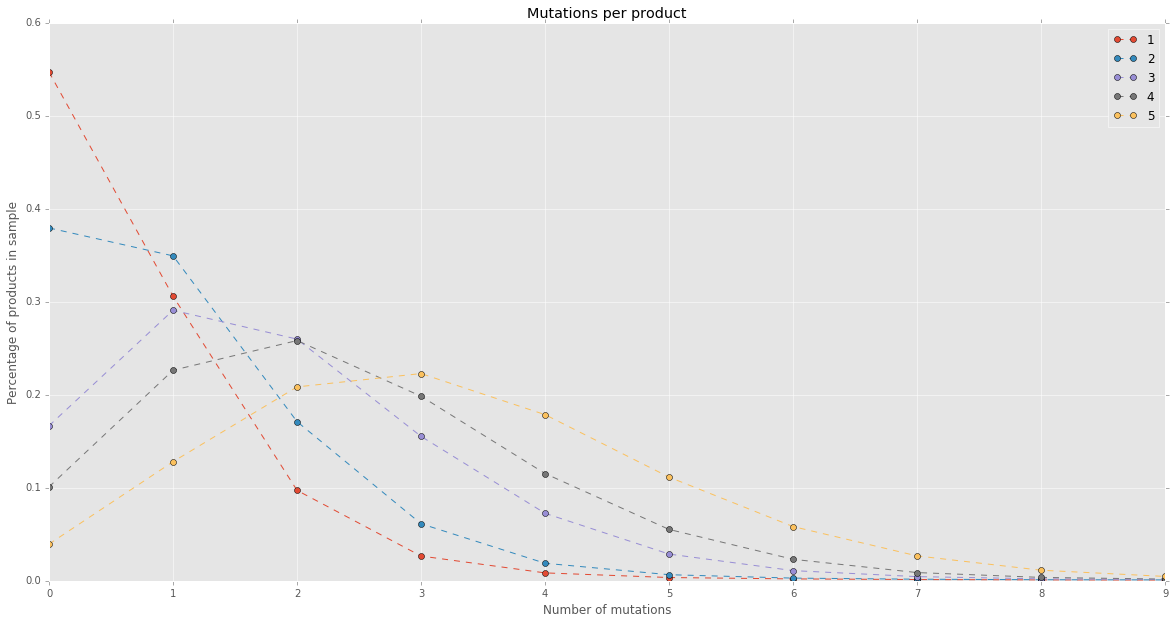

In [11]:
(mutlen_value_counts/mutlen_value_counts.sum()).head(10).plot(kind='line', figsize=(20,10), marker="o", linestyle="--", title="Mutations per product")
plt.xlabel("Number of mutations")
plt.ylabel("Percentage of products in sample")

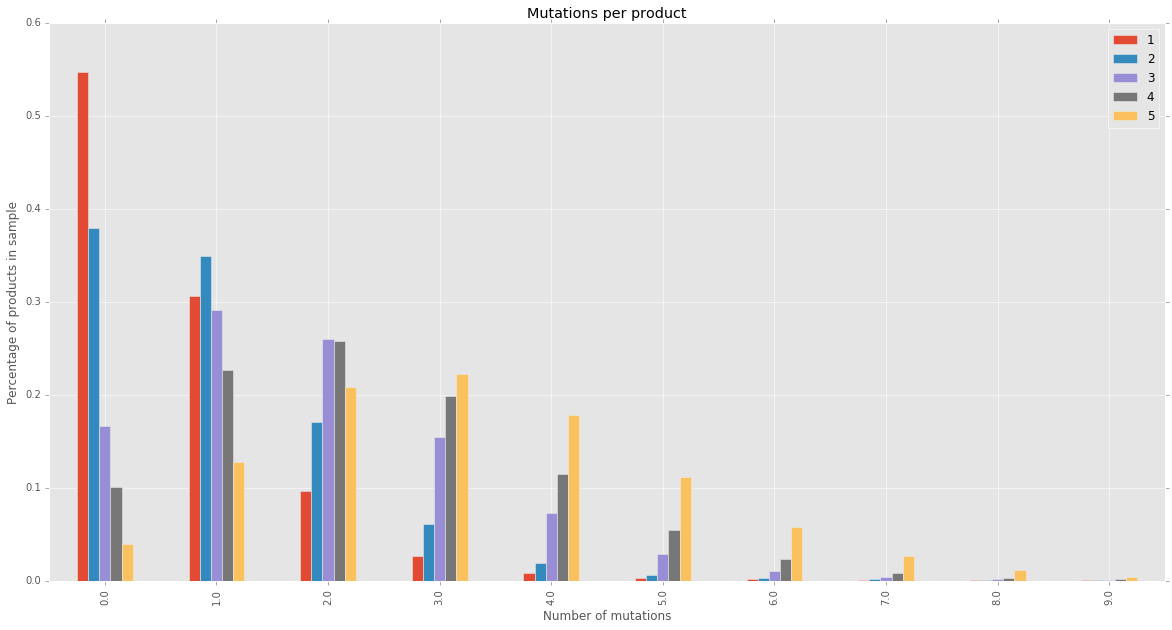

In [12]:
(mutlen_value_counts/mutlen_value_counts.sum()).head(10).plot(kind='bar', figsize=(20,10), title="Mutations per product")
plt.xlabel("Number of mutations")
plt.ylabel("Percentage of products in sample")

In [13]:
mutcounts_df = pd.DataFrame(mutcounts)

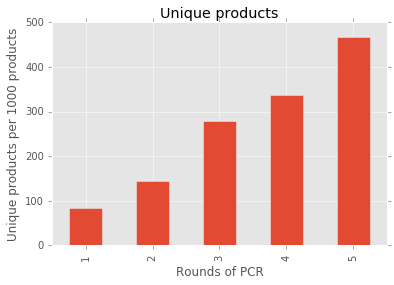

In [14]:
(mutcounts_df.count()/(mutcounts_df.sum()/1000))[:5].plot(kind='bar', title="Unique products")
plt.xticks(range(5), range(1,6))
plt.xlabel("Rounds of PCR")
plt.ylabel("Unique products per 1000 products")

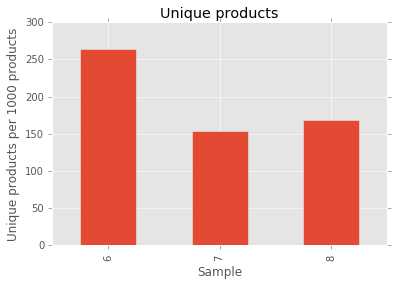

In [15]:
(mutcounts_df.count()/(mutcounts_df.sum()/1000))[5:].plot(kind='bar', title="Unique products")
plt.xticks(range(3), range(6,9))
plt.xlabel("Sample")
plt.ylabel("Unique products per 1000 products")

In [16]:
mutlen_value_counts_rest = pd.DataFrame([mutlensdf[x].dropna().value_counts() for x in [6,7,8]]).T

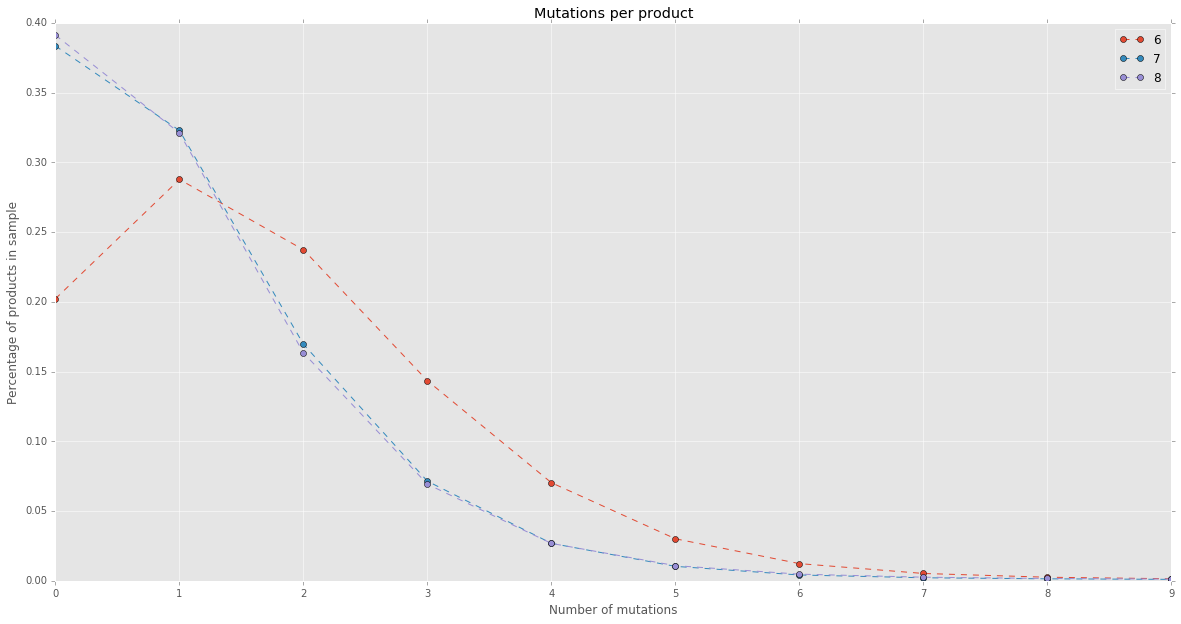

In [17]:
(mutlen_value_counts_rest/mutlen_value_counts_rest.sum()).head(10).plot(kind='line', figsize=(20,10), marker="o", linestyle="--", title="Mutations per product")
plt.xlabel("Number of mutations")
plt.ylabel("Percentage of products in sample")

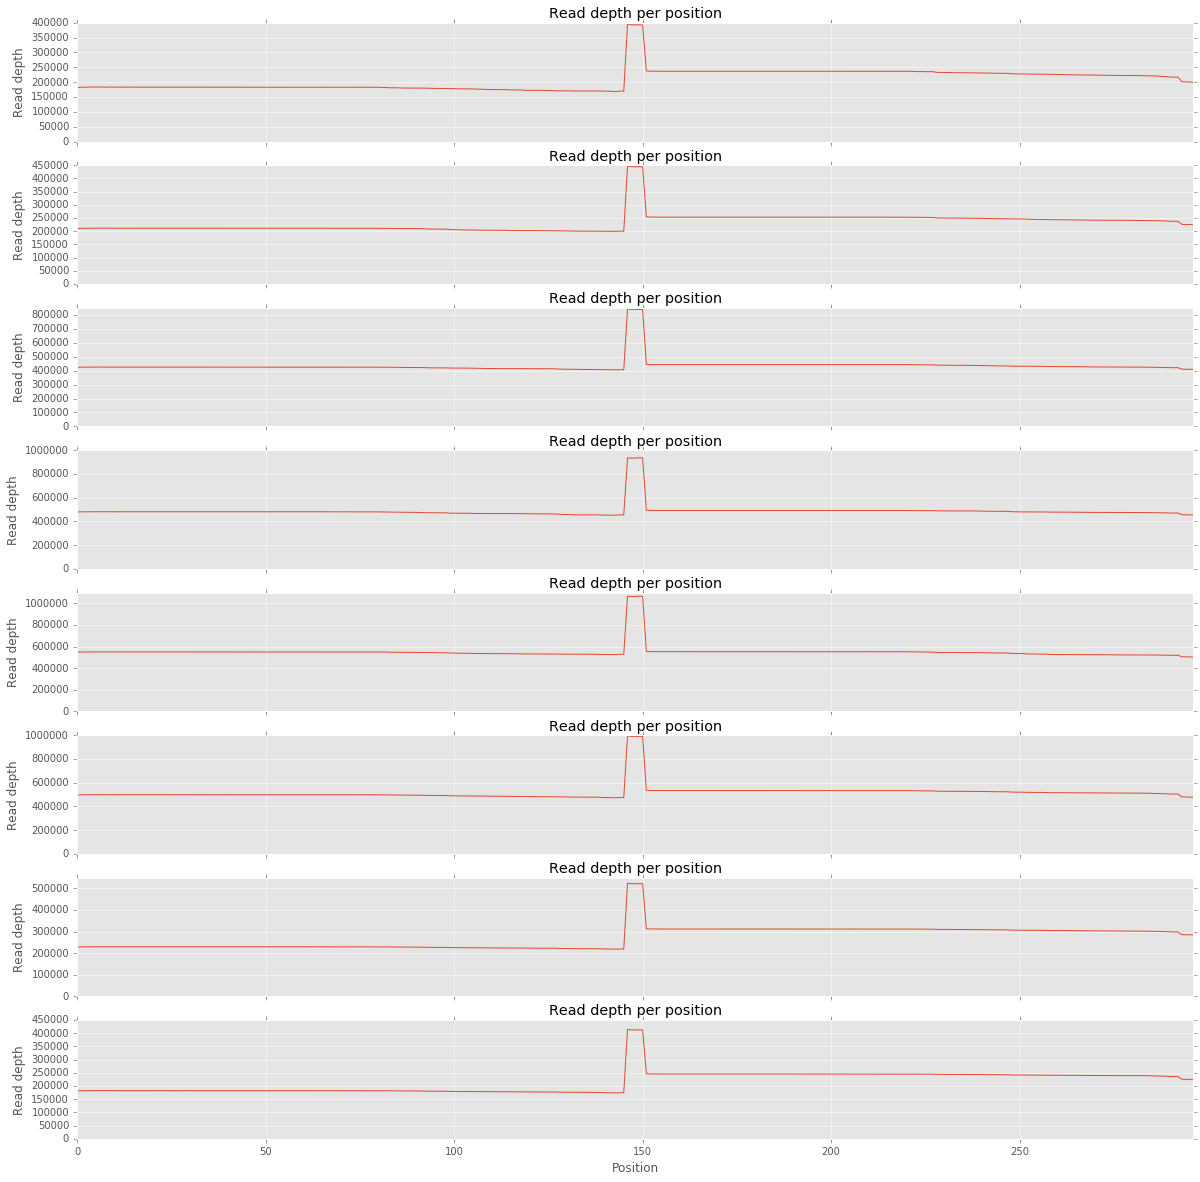

In [45]:
f, axs = plt.subplots(nrows=8, sharex=True, squeeze=True, figsize=(20,20))
for i, ppm in ppmuts.items():
    plots.coverage_plot(ppm, axs[i])

In [24]:
wt = str(next(parse("/home/laeb/data/bioinf/Tadas/wt.fa", "fasta")).seq)

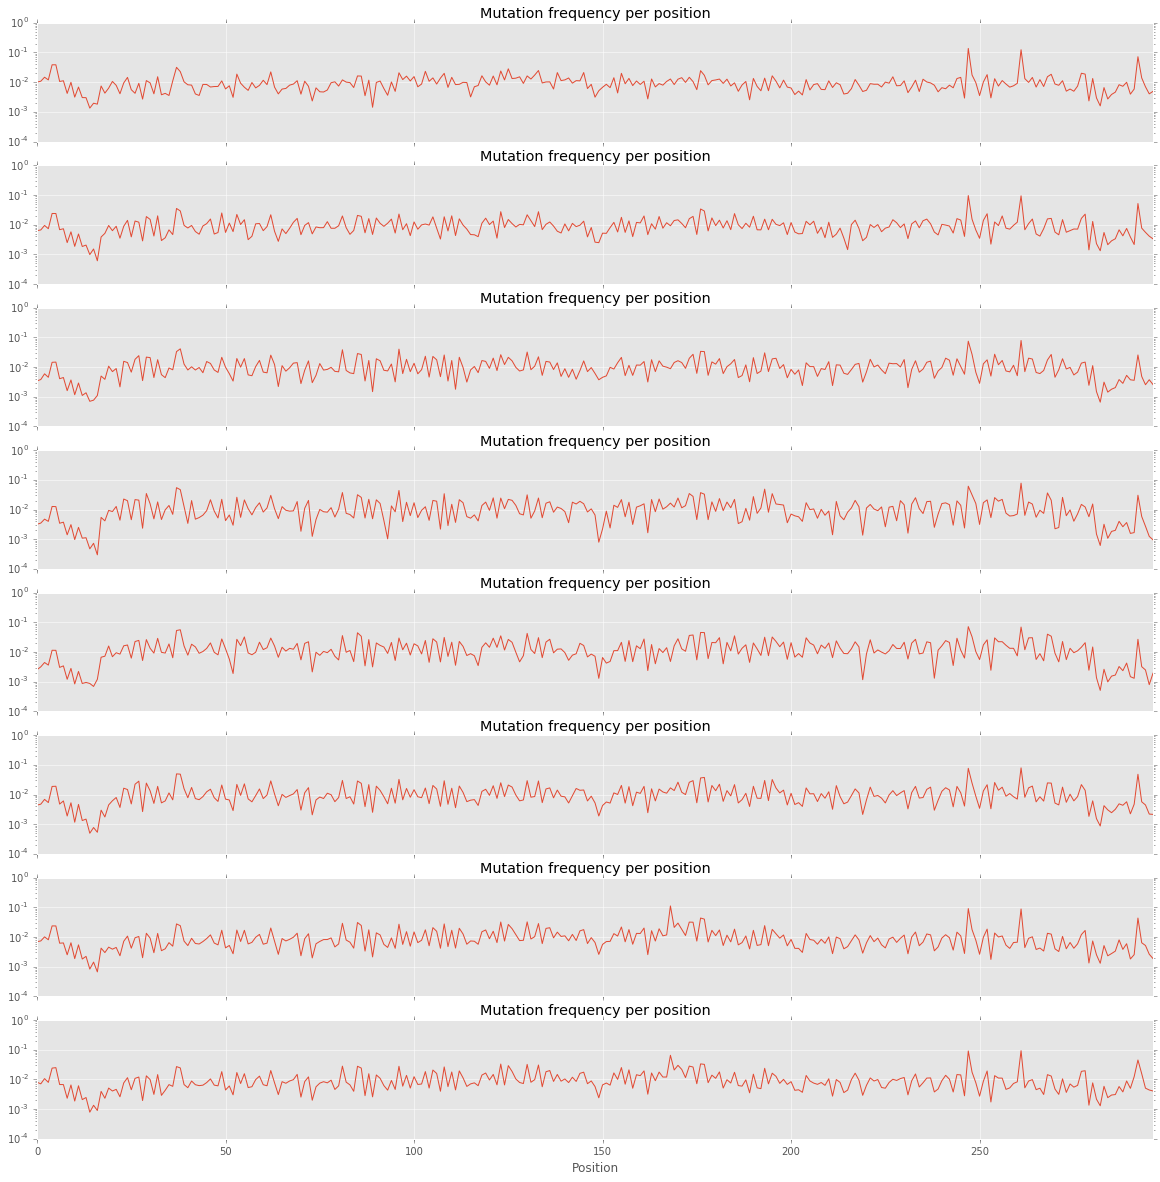

In [30]:
f, axs = plt.subplots(nrows=8, sharex=True, sharey=True, squeeze=True, figsize=(20,20))
for i, ppm in ppmuts.items():
    plots.mut_plot_sum(ppm, axs[i], wt)
    axs[i].set_ylabel("")

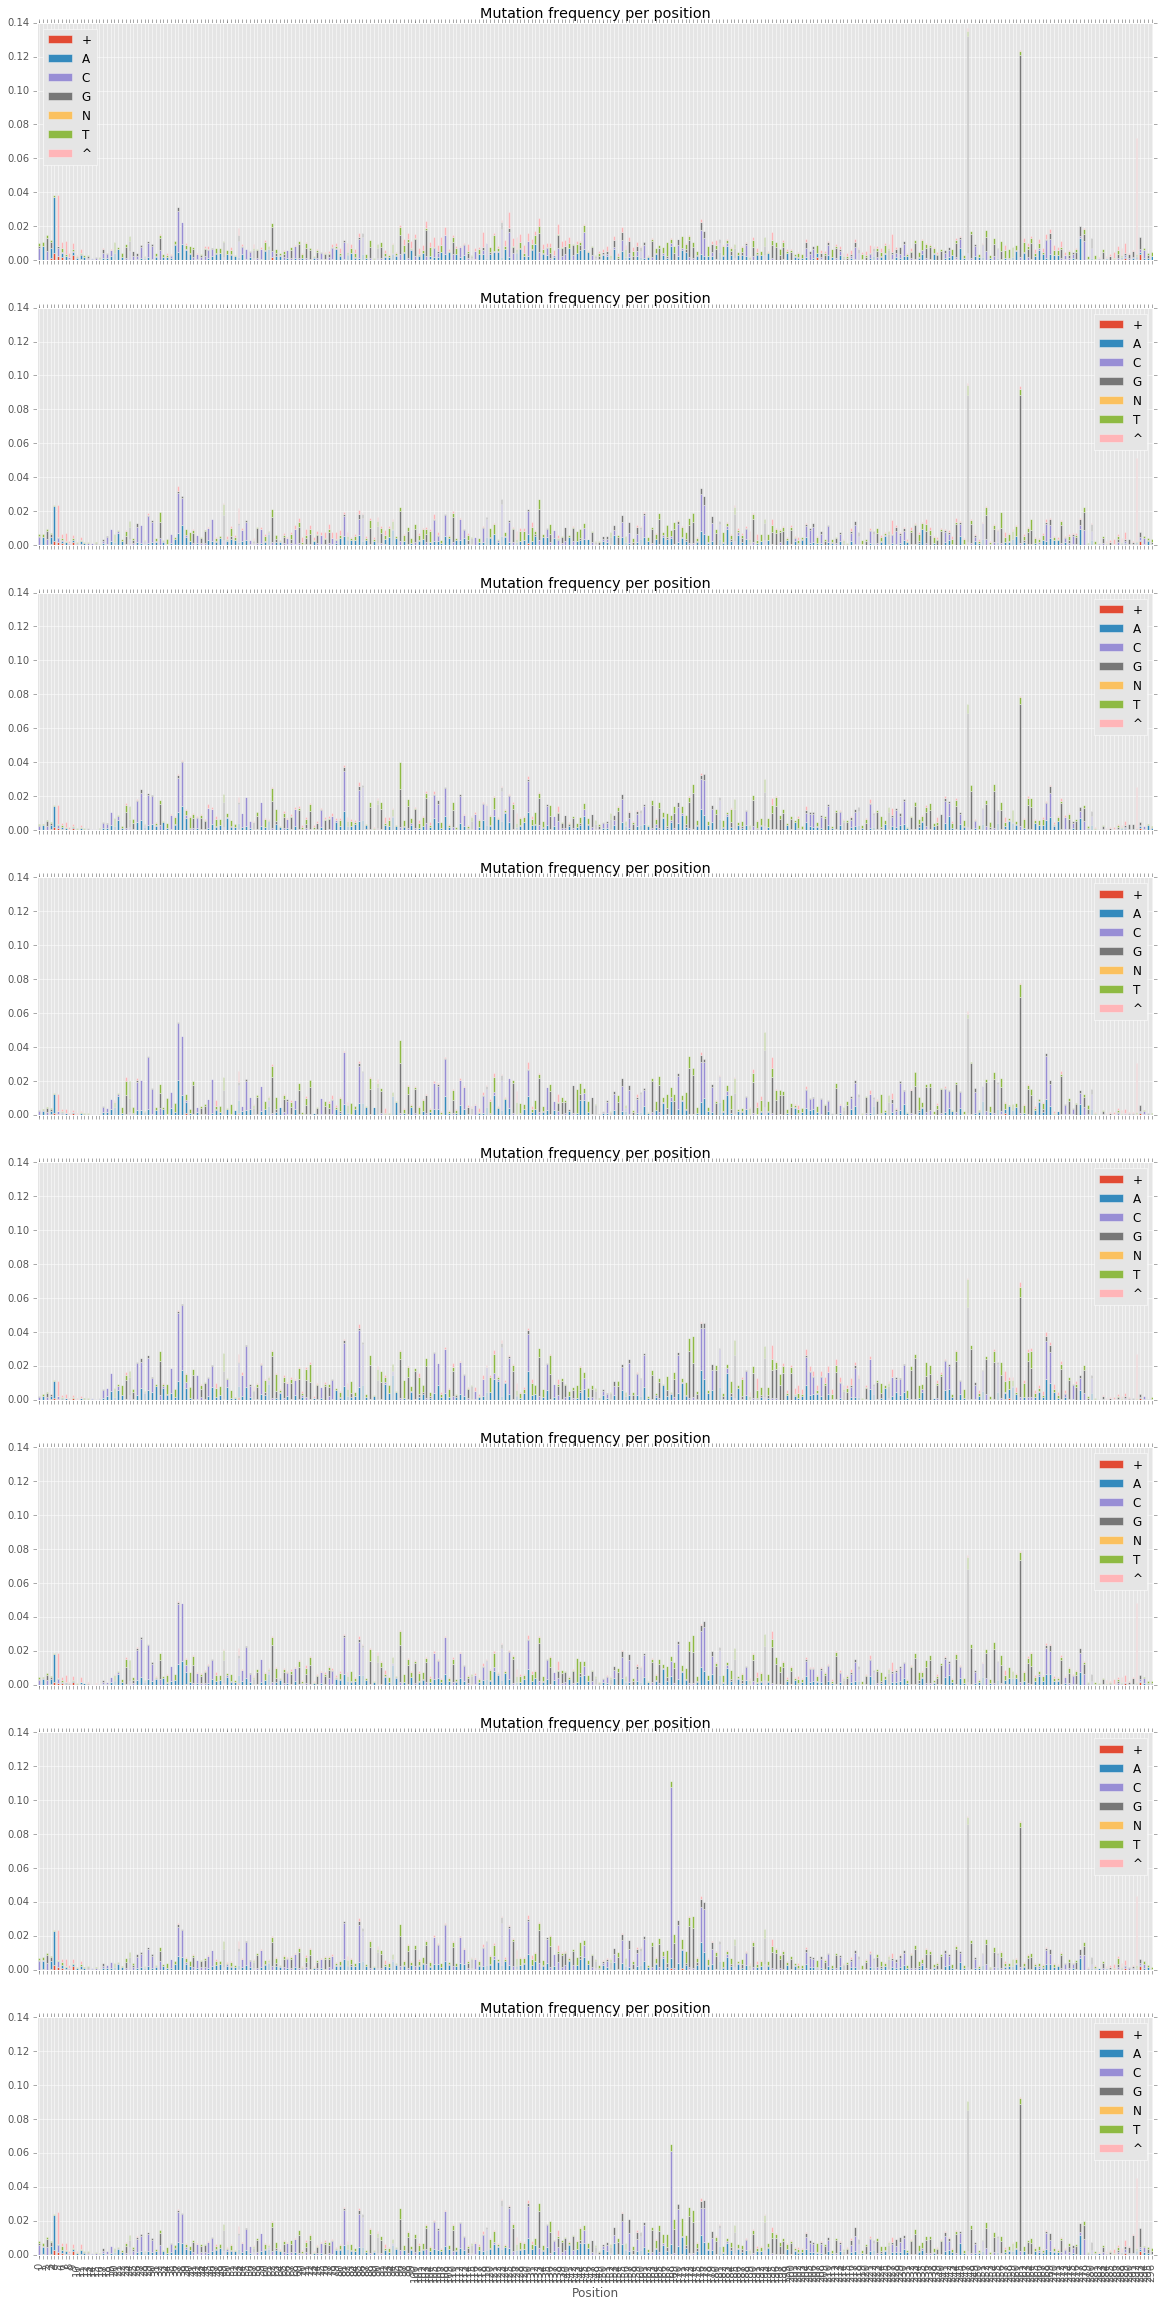

In [46]:
f, axs = plt.subplots(nrows=8, sharex=True, sharey=True, squeeze=True, figsize=(20,40))
for i, ppm in ppmuts.items():
    plots.mut_plot(ppm, axs[i], wt)
    axs[i].set_ylabel("")